In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/Airbnb data.csv')

In [3]:
dataset.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7.0,4.5,2.0,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45.0,4.5,4.0,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1.0,0.0,3.0,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7.0,5.0,4.0,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1.0,0.0,2.0,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
#no. of missing values
dataset.isnull().sum()

room_id                    0
survey_id                  0
host_id                    0
room_type                  0
country                 9321
city                       0
borough                 9321
neighborhood               0
reviews                    1
overall_satisfaction       1
accommodates               1
bedrooms                   1
bathrooms               9321
price                      1
minstay                 9321
name                      20
last_modified              1
latitude                   1
longitude                  1
location                   1
dtype: int64

In [5]:
dataset.shape

(9321, 20)

In [6]:
#The columns country,borough,bathrooms and minstay are completely null.
#so we drop them.
dataset.drop(columns=['country','borough','bathrooms','minstay'],inplace=True)

In [7]:
dataset.isnull().sum()

room_id                  0
survey_id                0
host_id                  0
room_type                0
city                     0
neighborhood             0
reviews                  1
overall_satisfaction     1
accommodates             1
bedrooms                 1
price                    1
name                    20
last_modified            1
latitude                 1
longitude                1
location                 1
dtype: int64

In [8]:
#name and other columns have very less null values.
#so we drop the rows corresponding to these null values.
dataset.dropna(inplace=True)

In [9]:
dataset.isnull().sum()

room_id                 0
survey_id               0
host_id                 0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
last_modified           0
latitude                0
longitude               0
location                0
dtype: int64

In [10]:
#now there are no missing values in the dataset.

In [11]:
rooms=dataset['room_type'].value_counts()

In [12]:
rooms

Entire home/apt    9238
Shared room          63
Name: room_type, dtype: int64

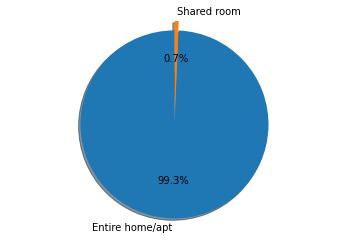

In [13]:
labels=['Entire home/apt','Shared room']
rooms_count=dataset['room_type'].value_counts().to_list()
explode=(0.1,0)
#only explode the 1st slice.
fig1,ax1=plt.subplots()
ax1.pie(rooms_count,explode=explode,labels=labels,autopct="%1.1f%%",shadow=True,startangle=90)
ax1.axis('equal')
#equal aspect ratio ensures pie is drawn as a circle.
plt.show()

In [14]:
(63/9238)*100

0.6819657934617883

In [15]:
#Shared room is just 0.7 % of all the room types.
#Guests prefer entire home or apartment much more than the shared rooms.

In [16]:
#finding the neighbourhood which has the most occurence in the dataset.
dataset['neighborhood'].value_counts()

De Baarsjes / Oud West                    1696
De Pijp / Rivierenbuurt                   1394
Centrum West                              1302
Centrum Oost                              1020
Noord-West / Noord-Midden                  849
Westerpark                                 645
Oud Oost                                   492
Bos en Lommer                              354
Oostelijk Havengebied / Indische Buurt     314
Watergraafsmeer                            227
Ijburg / Eiland Zeeburg                    216
Oud Noord                                  193
Slotervaart                                141
Buitenveldert / Zuidas                     112
Noord Oost                                  80
Noord West                                  77
Osdorp                                      53
Geuzenveld / Slotermeer                     44
De Aker / Nieuw Sloten                      38
Bijlmer Oost                                23
Bijlmer Centrum                             18
Gaasperdam / 

Text(0, 0.5, 'Counts')

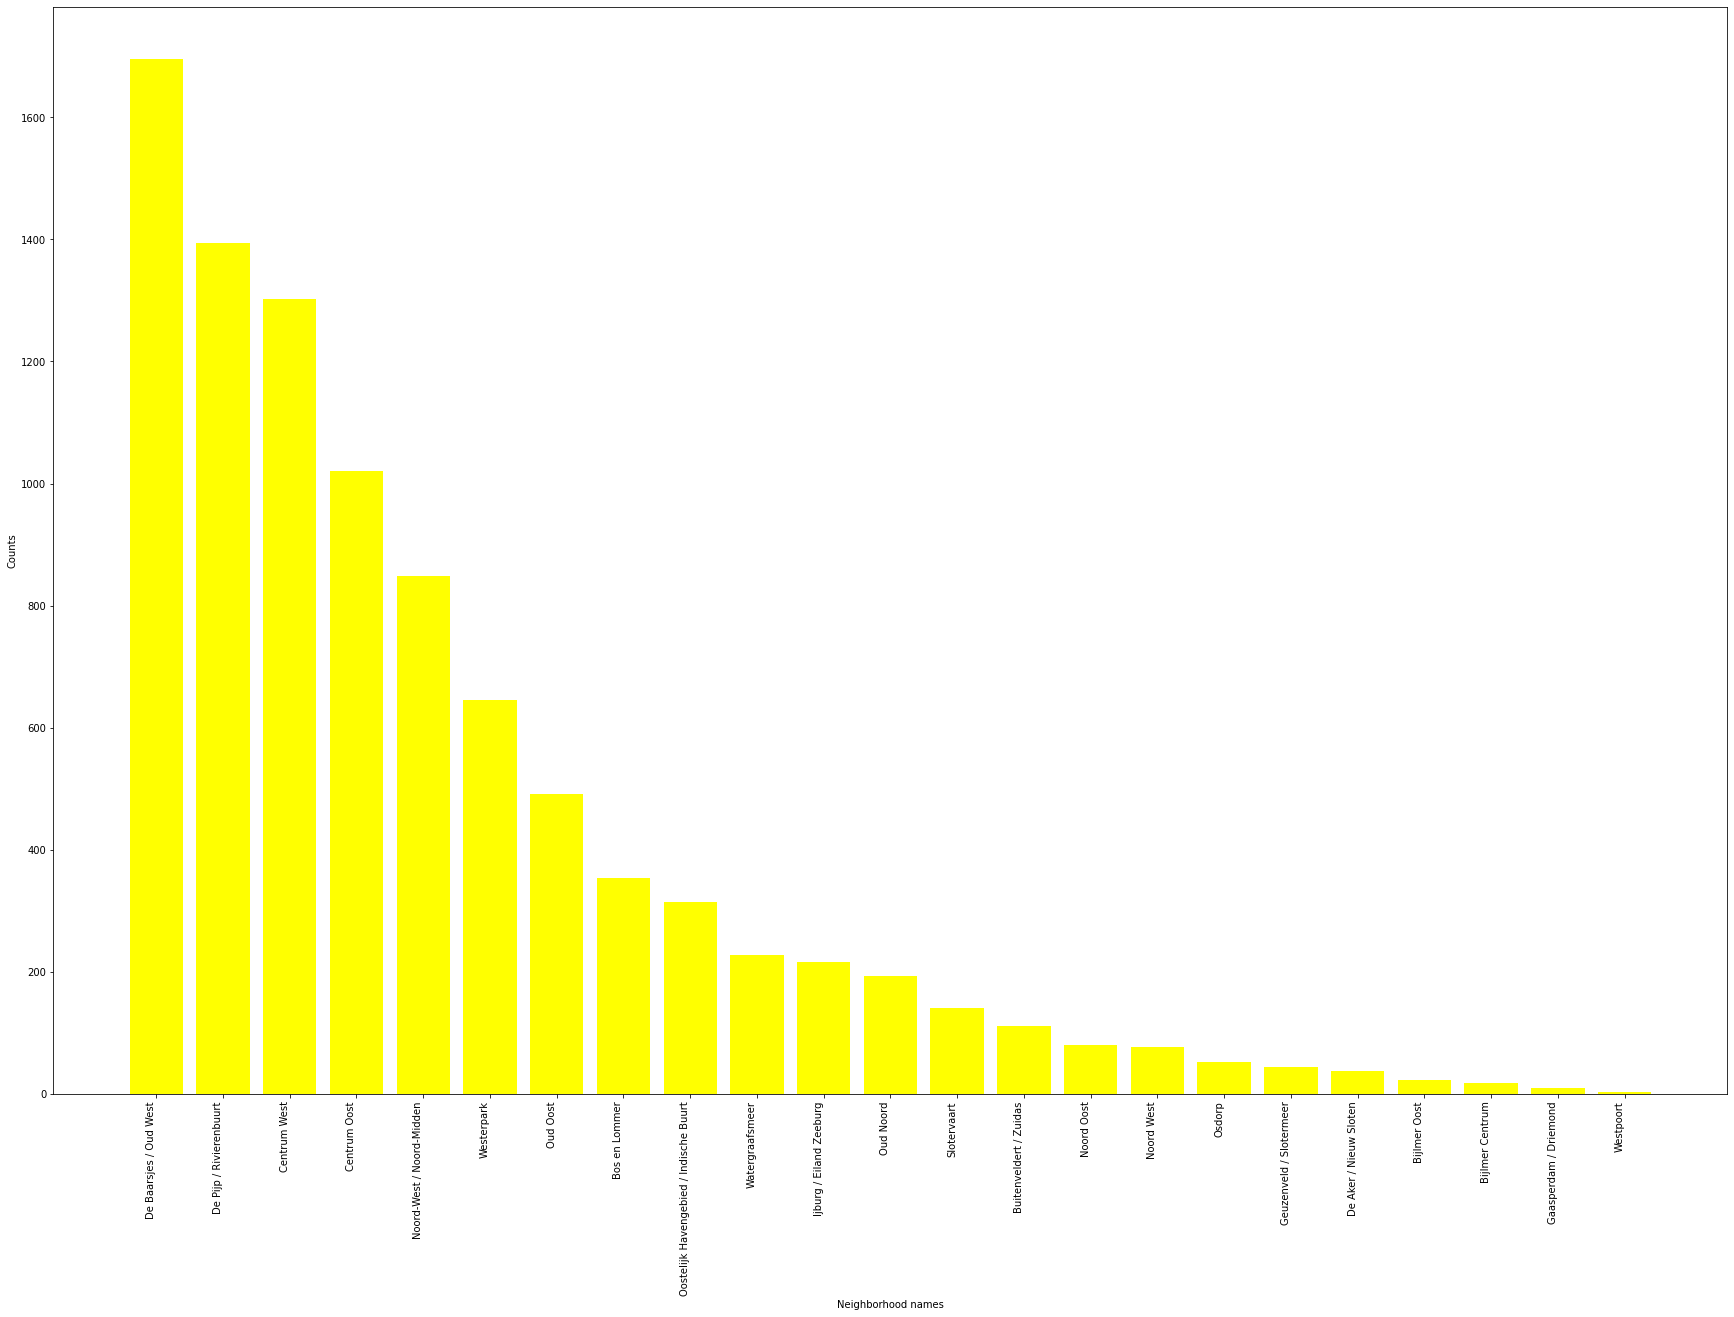

In [17]:
neighborhood_count=dataset['neighborhood'].value_counts().to_list()
figure=plt.figure(figsize=[30,20])
plt.bar(dataset['neighborhood'].value_counts().index,neighborhood_count,color='yellow')
plt.xticks(rotation=90,ha='right')
plt.xlabel('Neighborhood names')
plt.ylabel('Counts')

In [18]:
#From the graph we can see that De Baarsjes / Oud West has the most count or is the
#most popular.
#Westpoort has the least count or the least popularity.

In [19]:
dataset['reviews'].value_counts()

0.0      1654
1.0       753
2.0       646
3.0       576
4.0       481
         ... 
151.0       1
232.0       1
112.0       1
136.0       1
109.0       1
Name: reviews, Length: 154, dtype: int64

In [20]:
reviews_count=pd.Series(dataset['reviews'].value_counts())
pd.set_option("display.max_rows",None,"display.max_columns",None)
print(reviews_count)

0.0      1654
1.0       753
2.0       646
3.0       576
4.0       481
5.0       452
6.0       388
7.0       365
8.0       309
9.0       284
10.0      242
11.0      239
12.0      205
13.0      174
14.0      171
15.0      157
16.0      151
17.0      130
18.0      127
20.0      111
19.0      108
22.0       90
21.0       88
23.0       80
27.0       72
25.0       70
24.0       70
26.0       67
29.0       62
32.0       58
28.0       56
30.0       47
33.0       46
31.0       44
37.0       36
36.0       34
34.0       34
35.0       32
42.0       26
38.0       26
43.0       25
39.0       23
46.0       23
48.0       22
45.0       22
41.0       21
49.0       19
40.0       16
51.0       16
44.0       16
47.0       14
54.0       14
53.0       13
50.0       13
59.0       12
58.0       11
55.0       11
52.0       11
60.0       10
57.0       10
66.0        9
56.0        7
98.0        6
62.0        6
63.0        6
78.0        5
61.0        5
73.0        5
76.0        5
67.0        5
69.0        5
71.0  

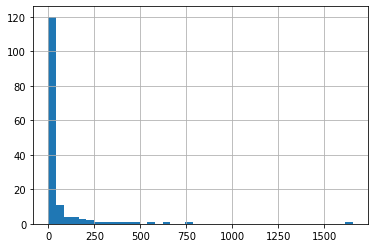

In [21]:
#plotting histogram for showing count for each review.
reviews_count.hist(bins=40)

In [22]:
#from the above data and histogram we find that count of reviews 0 to 20 are
#comparatively higher than other values.

In [23]:
dataset['overall_satisfaction'].value_counts()

5.0    3990
0.0    3056
4.5    1976
4.0     228
3.5      41
3.0       8
1.5       1
2.5       1
Name: overall_satisfaction, dtype: int64

In [24]:
#from above we get the overall satisfaction count w.r.to ratings.

Text(0.5, 1.0, 'Overall Satisfaction Count VS Rating')

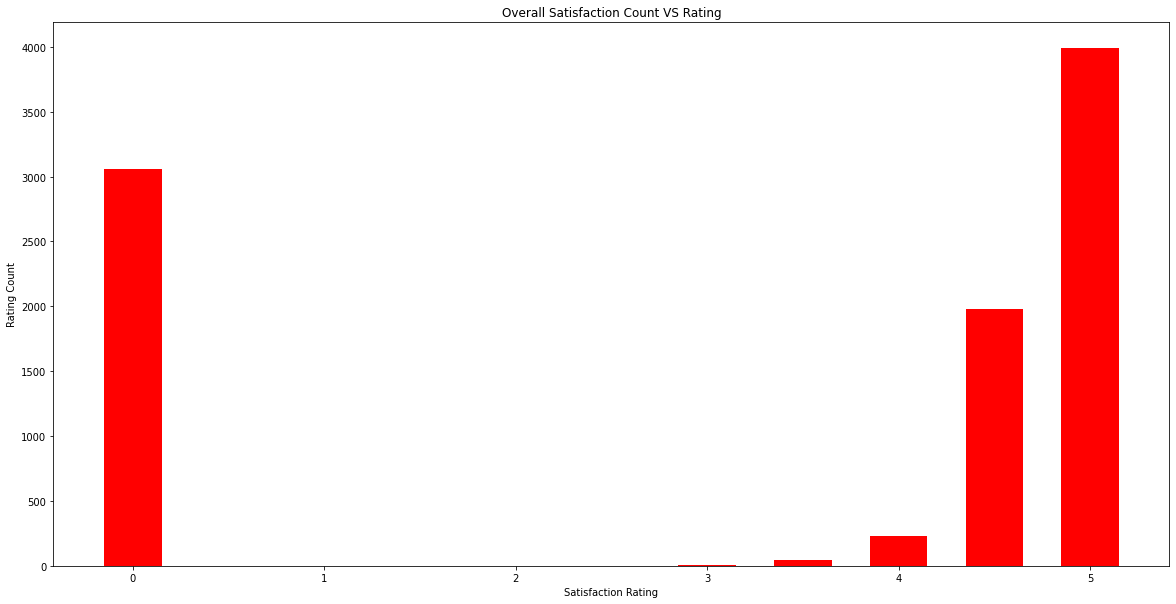

In [25]:
fig=plt.figure(figsize=[20,10])
plt.bar(dataset['overall_satisfaction'].value_counts().index,dataset['overall_satisfaction'].value_counts().to_list(),color='red',width=0.3)
plt.xlabel('Satisfaction Rating')
plt.ylabel('Rating Count')
plt.title("Overall Satisfaction Count VS Rating")

In [26]:
#from the dataset and graph above we find that Satisfaction rating 5.0 has the 
#maximum count i.e. a large community of people are satisfied by the services
#provided by Airbnb.

In [27]:
#count of accomodation values
accomodation_counts=dataset['accommodates'].value_counts()
accomodation_counts

4.0     4285
2.0     3187
3.0      792
6.0      420
5.0      394
8.0       96
7.0       43
1.0       24
16.0      19
10.0      14
12.0      10
9.0        7
14.0       6
11.0       2
13.0       1
17.0       1
Name: accommodates, dtype: int64

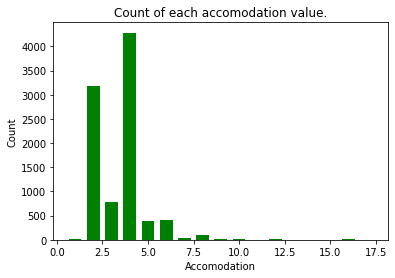

In [28]:
size=accomodation_counts.to_list()
labels=accomodation_counts.index
plt.bar(labels,size,width=0.7,color='green')
plt.xlabel("Accomodation")
plt.ylabel("Count")
plt.title("Count of each accomodation value.")
plt.show()

In [29]:
#from above we can see that the most available accomodations are 2 and 4.

In [30]:
#most properties available.
most_prop_available=dataset['price'].value_counts()
print(most_prop_available)

180.0     923
150.0     557
240.0     465
156.0     422
300.0     366
168.0     363
144.0     343
210.0     305
179.0     250
192.0     248
162.0     241
216.0     223
270.0     186
132.0     181
174.0     161
155.0     159
204.0     150
167.0     139
359.0     134
234.0     129
198.0     125
264.0     125
239.0     118
228.0     109
186.0      83
420.0      83
138.0      83
222.0      76
203.0      70
480.0      70
191.0      69
143.0      67
252.0      65
288.0      63
330.0      63
126.0      60
131.0      58
227.0      54
215.0      47
299.0      42
276.0      41
354.0      41
336.0      37
294.0      34
148.0      31
258.0      29
384.0      27
282.0      26
163.0      25
540.0      24
177.0      24
312.0      24
358.0      24
450.0      24
599.0      23
275.0      21
173.0      21
246.0      21
342.0      21
238.0      20
153.0      20
161.0      19
324.0      19
390.0      19
170.0      18
145.0      18
176.0      17
151.0      17
263.0      17
419.0      16
152.0      16
158.0 

In [31]:
graph={'Price':most_prop_available.index.to_list(),'Properties Available':most_prop_available.to_list()}
most_prop_available_df=pd.DataFrame(graph)
most_prop_available_df

,Price,Properties Available
0,180.0,923
1,150.0,557
2,240.0,465
3,156.0,422
4,300.0,366
5,168.0,363
6,144.0,343
7,210.0,305
8,179.0,250
9,192.0,248


In [32]:
#from the dataframe above we can conclude that price = 180 has the maximimum properties.

In [33]:
#info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9301 entries, 0 to 9319
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               9301 non-null   int64  
 1   survey_id             9301 non-null   int64  
 2   host_id               9301 non-null   int64  
 3   room_type             9301 non-null   object 
 4   city                  9301 non-null   object 
 5   neighborhood          9301 non-null   object 
 6   reviews               9301 non-null   float64
 7   overall_satisfaction  9301 non-null   float64
 8   accommodates          9301 non-null   float64
 9   bedrooms              9301 non-null   float64
 10  price                 9301 non-null   float64
 11  name                  9301 non-null   object 
 12  last_modified         9301 non-null   object 
 13  latitude              9301 non-null   float64
 14  longitude             9301 non-null   float64
 15  location             

Text(0.5, 1.0, 'Relationship between Price and Reviews')

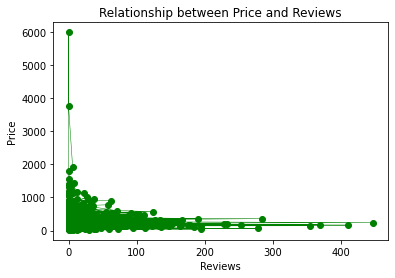

In [34]:
#checking relationship between price and reviews.
plt.plot(dataset['reviews'],dataset['price'],marker='o',c='green',linewidth=0.5)
plt.xlabel("Reviews")
plt.ylabel("Price")
plt.title("Relationship between Price and Reviews")

In [35]:
#finding correlation
from scipy.stats import pearsonr
correlation,_=pearsonr(dataset['reviews'],dataset['price'])
print('Pearson Correlation: %3f'%correlation)

Pearson Correlation: -0.007678


In [36]:
#we find negative trend relationship between price and reviews.
#so,if no. of reviews increase then prices will decrease.

In [37]:
dataset.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'city', 'neighborhood',
       'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price',
       'name', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [38]:
df=dataset[['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price']]
correlation=df.corr()
print(correlation)

                       reviews  overall_satisfaction  accommodates  bedrooms  \
reviews               1.000000              0.389559      0.025589 -0.062028   
overall_satisfaction  0.389559              1.000000     -0.039304 -0.074010   
accommodates          0.025589             -0.039304      1.000000  0.706613   
bedrooms             -0.062028             -0.074010      0.706613  1.000000   
price                -0.007678             -0.041487      0.405504  0.343098   

                         price  
reviews              -0.007678  
overall_satisfaction -0.041487  
accommodates          0.405504  
bedrooms              0.343098  
price                 1.000000  


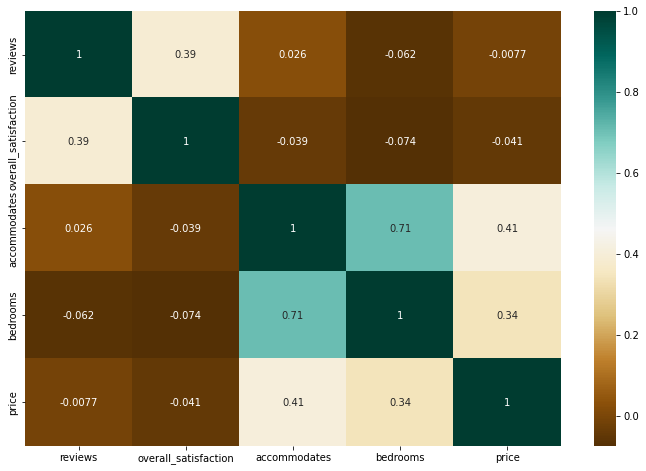

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,cmap = 'BrBG', annot = True)
plt.show()

In [40]:
#above is a heatmap showing correlation between different attributes of the dataset.

Text(0.5, 1.0, 'Relationship between price and accomodates')

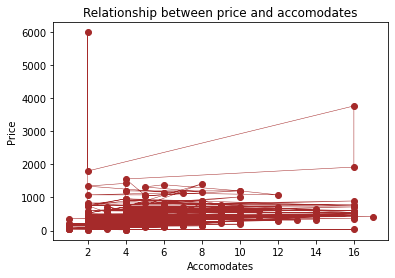

In [41]:
#checking relationship between price and accomodates.
plt.plot(dataset['accommodates'],dataset['price'],marker='o',c='brown',linewidth=0.5)
plt.xlabel("Accomodates")
plt.ylabel("Price")
plt.title("Relationship between price and accomodates")

In [42]:
#finding correlation by Pearson coefficient.
correlation,_=pearsonr(dataset['accommodates'],dataset['price'])
print('Pearson correlation: %3f' % correlation)

Pearson correlation: 0.405504


In [43]:
#from the above graph and correlation value we find that there is slightly positive
#or weak positive correlation or relationship between price and accomodates.
#if no. of accomodates increase then price will also increase.

Text(0.5, 1.0, 'Relationship between Price And Overall Satisfaction')

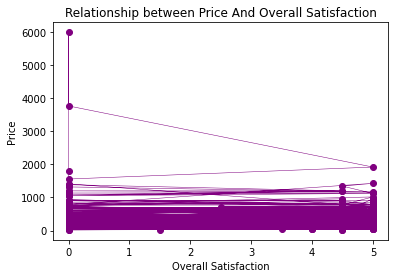

In [44]:
#finding relationship between price and Overall Satisfaction
plt.plot(dataset['overall_satisfaction'],dataset['price'],marker='o',c='purple',linewidth=0.5)
plt.xlabel("Overall Satisfaction")
plt.ylabel("Price")
plt.title("Relationship between Price And Overall Satisfaction")

In [45]:
#correlation by Pearson correlation coefficient
correlation,_=pearsonr(dataset['overall_satisfaction'],dataset['price'])
print('Pearson Correlation: %3f' % correlation)

Pearson Correlation: -0.041487


In [46]:
#from above graph and correlation value we see that there is negative linear
#relationship between overall_satisfaction and price.
#if overall satisfaction increases then price will decrease.

In [47]:
dataset['bedrooms']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
30       1.0
31       1.0
32       1.0
33       4.0
34       3.0
35       3.0
36       3.0
37       4.0
38       2.0
39       4.0
40       2.0
41       2.0
42       4.0
43       2.0
44       2.0
45       1.0
46       0.0
47       4.0
48       3.0
49       2.0
50       2.0
51       2.0
52       4.0
53       3.0
54       4.0
55      10.0
56       3.0
57       3.0
58       3.0
59       0.0
60       5.0
61       4.0
62       3.0
63       5.0
64       1.0
65       2.0
66       3.0
67       3.0
68       3.0
69       4.0
70       2.0
71       1.0
72       3.0
73       4.0
74       5.0
75       2.0
76       4.0

In [48]:
#share of different bedroom values int total bedroom value.
bedroom_count=dataset['bedrooms'].value_counts()
Totalbedrooms=bedroom_count.sum()
data={'Bedroom_values':bedroom_count.index.to_list(),'Share/Proportion':bedroom_count.to_list()}
bedroom_count_df=pd.DataFrame(data)
print("Total no. of Bedrooms available : ",Totalbedrooms)
print(dataset.shape)

Total no. of Bedrooms available :  9301
(9301, 16)


In [49]:
print("Each bedroom's share : ")
bedroom_count_df

Each bedroom's share : 


,Bedroom_values,Share/Proportion
0,1.0,3857
1,2.0,3347
2,3.0,1273
3,4.0,435
4,0.0,296
5,5.0,62
6,6.0,18
7,10.0,5
8,7.0,3
9,8.0,3


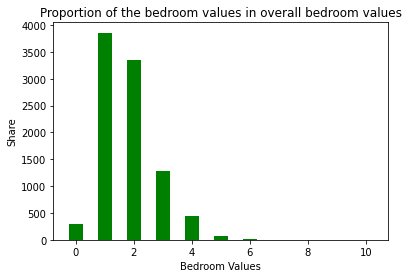

In [50]:
sizes=bedroom_count.to_list()
labels=bedroom_count.index.to_list()
plt.bar(labels,sizes,width=0.5,color='green')
plt.xlabel("Bedroom Values")
plt.ylabel("Share")
plt.title("Proportion of the bedroom values in overall bedroom values")
plt.show()

In [51]:
#It is clear from graph above that bedroom values 1 and 2 have the most share in overall bedroom values.

Text(0.5, 1.0, 'Histogram for Reviews Column')

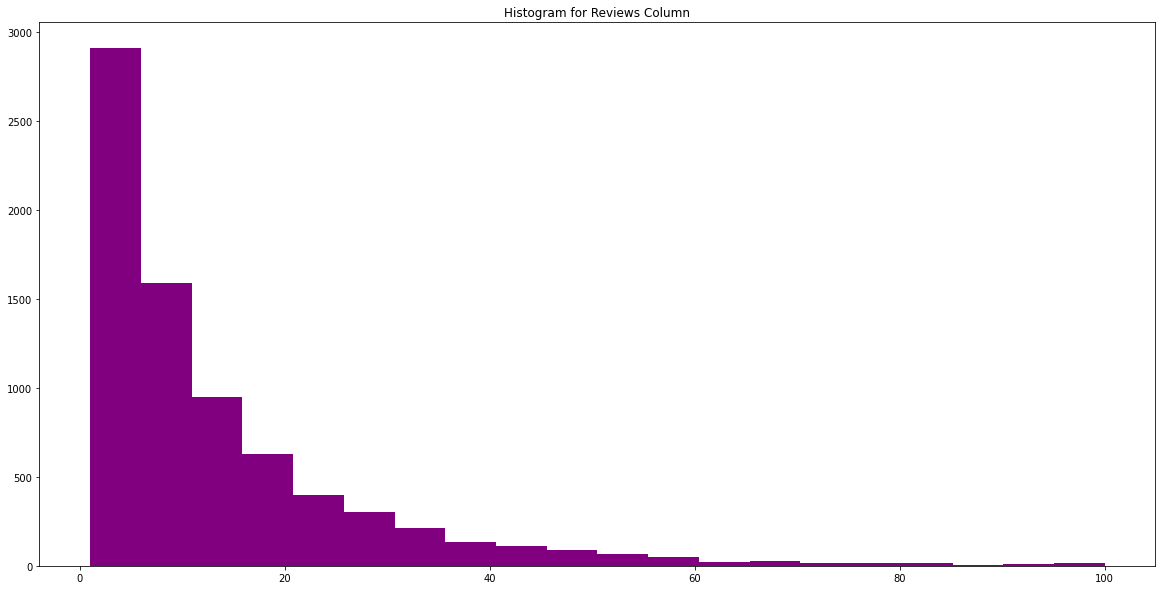

In [52]:
#Histogram plot of reviews column.
fig=plt.figure(figsize=[20,10])
plt.hist('reviews',bins=20,range=(1,100),data=dataset,color='purple')
plt.title("Histogram for Reviews Column")

Text(0.5, 1.0, 'Histogram for Overall_Satisfaction Column')

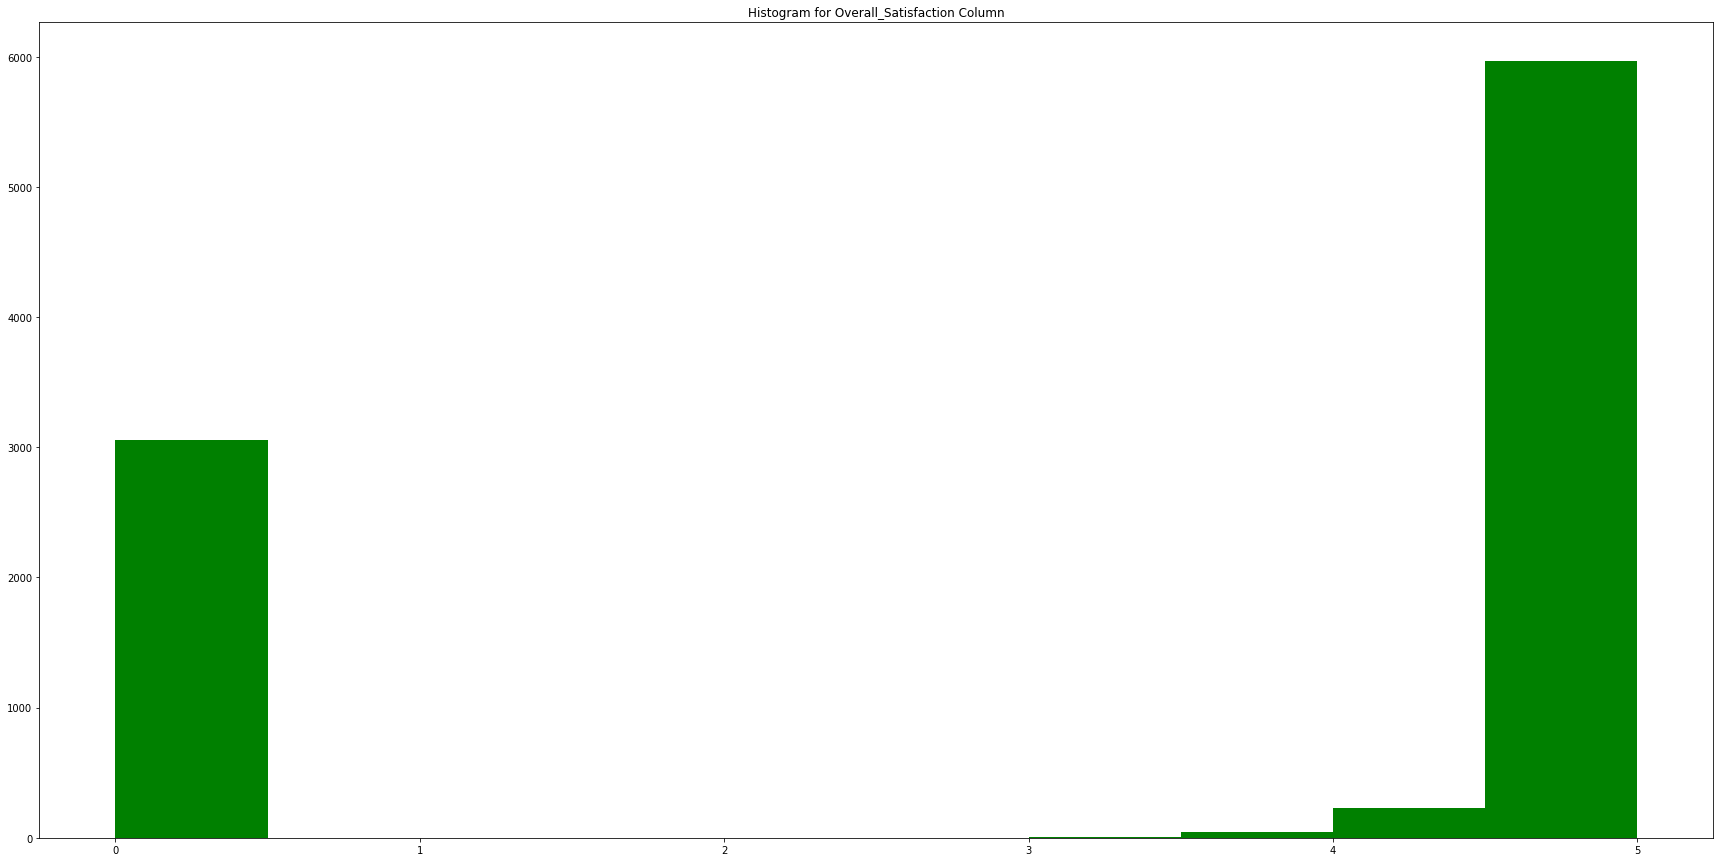

In [53]:
#Histogram plot of overall_satisfaction column.
fig=plt.figure(figsize=[30,15])
plt.hist('overall_satisfaction',bins=10,data=dataset,color='green')
plt.title('Histogram for Overall_Satisfaction Column')